# Importação de bibliotecas


In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import random
%matplotlib inline
from glob import glob
import cv2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.layers import LeakyReLU, ELU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from timeit import default_timer as timer
from tensorflow.keras.layers import Dropout, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization

import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics

import seaborn as sb
import pandas as pd

from prettytable import PrettyTable

import os

#Dados
O dataset foi adquirido unindo o dataset do Raimundo Farrapo Pinto Junior, Ialis Cavalvante de Paula Junior, "Static Hand Gesture ASL Dataset" e o dataset do 
Barczak "A new 2D static hand gesture colour image dataset for ASL gestures." 
Obtendo o total de 3626 imagens de sinais estáticos do alfabeto ASL (Língua Americana de Sinais).


contém 26 classes com 110 exemplos cada.

In [ ]:
pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Colab Notebooks/TCC/dataset_tcc', output="/content/drive/MyDrive/TCC1/partition/partition-1", seed=1337, ratio=(.7, 0.1,0.2)) 

In [ ]:
data_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'O': 13,
 'P': 14,
 'Q': 15,
 'R': 16,
 'S': 17,
 'T': 18,
 'U': 19,
 'V': 20,
 'W': 21,
 'X': 22,
 'Y': 23}

In [ ]:
tamanho = []

In [ ]:

import os, sys

# Open a file
path = "/content/drive/MyDrive/Colab Notebooks/TCC/dataset_tcc/Y"
dirs = os.listdir( path )
qtd = 0
#tamanho = []
for file in dirs:
   #print (file)
   qtd += 1

tamanho.append(qtd)

Text(0, 0.5, 'Quantidade')

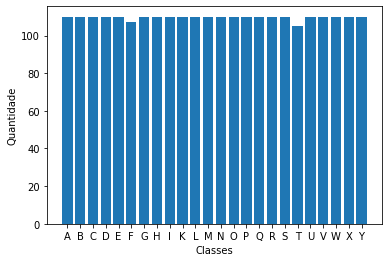

In [ ]:

plt.bar(classe, tamanho)
plt.xticks(classe)
plt.yticks() #This may be included or excluded as per need
plt.xlabel('Classes')
plt.ylabel('Quantidade')

In [ ]:
import matplotlib.image as mpimg

In [ ]:
def plot_one_sample_of_each(base_path):
    cols = 5
    rows = int(np.ceil(len(CLASSES) / cols))
    fig = plt.figure(figsize=(16, 20))
    
    for i in range(len(CLASSES)):
        cls = CLASSES[i]
        img_path = base_path + '/' + cls + '/**'
        path_contents = glob(img_path)
    
        imgs = random.sample(path_contents, 1)

        sp = plt.subplot(rows, cols, i + 1)
        
        imagem = mpimg.imread(imgs[0])
        plt.imshow(imagem)



        #plt.imshow( cv2.imread(imgs[0]))
        #print(imgs)
        plt.title(cls)
        sp.axis('off')

    plt.show()
    return

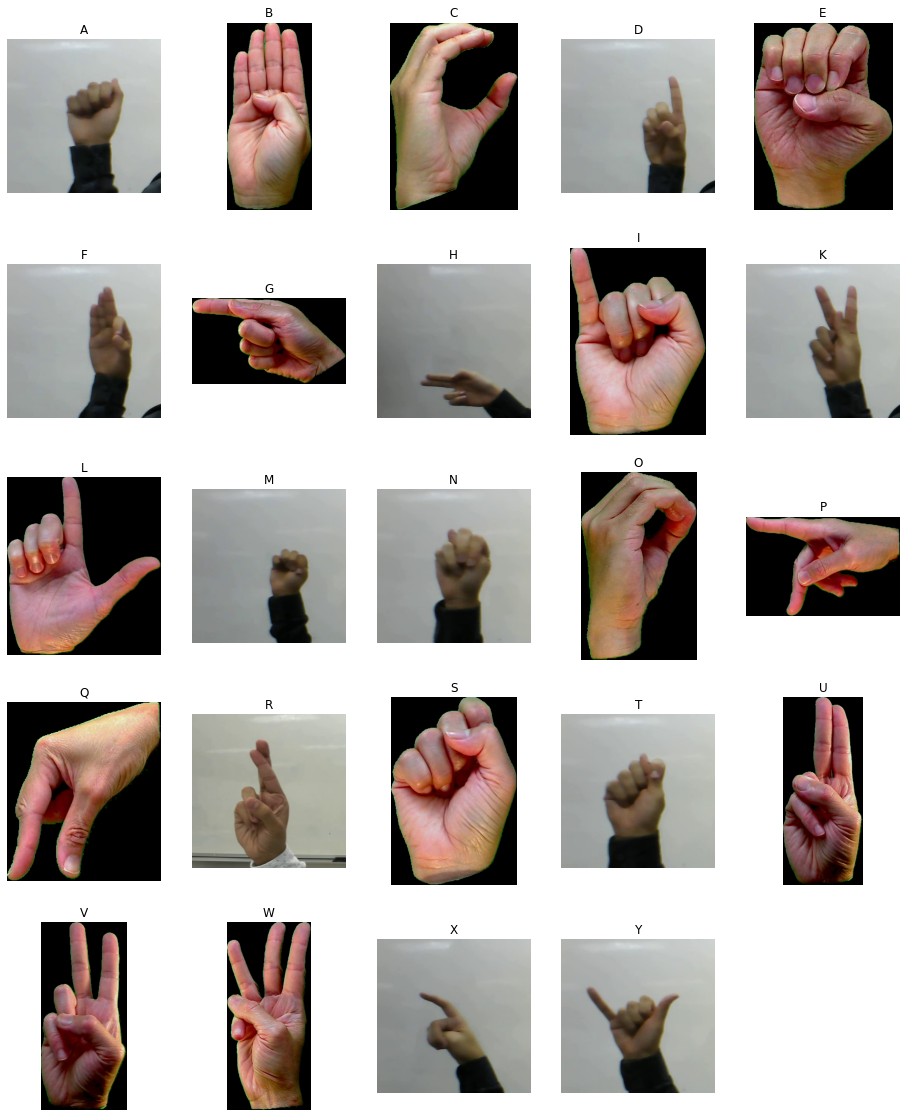

In [ ]:
plot_one_sample_of_each(TRAIN_DIR)

In [ ]:
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

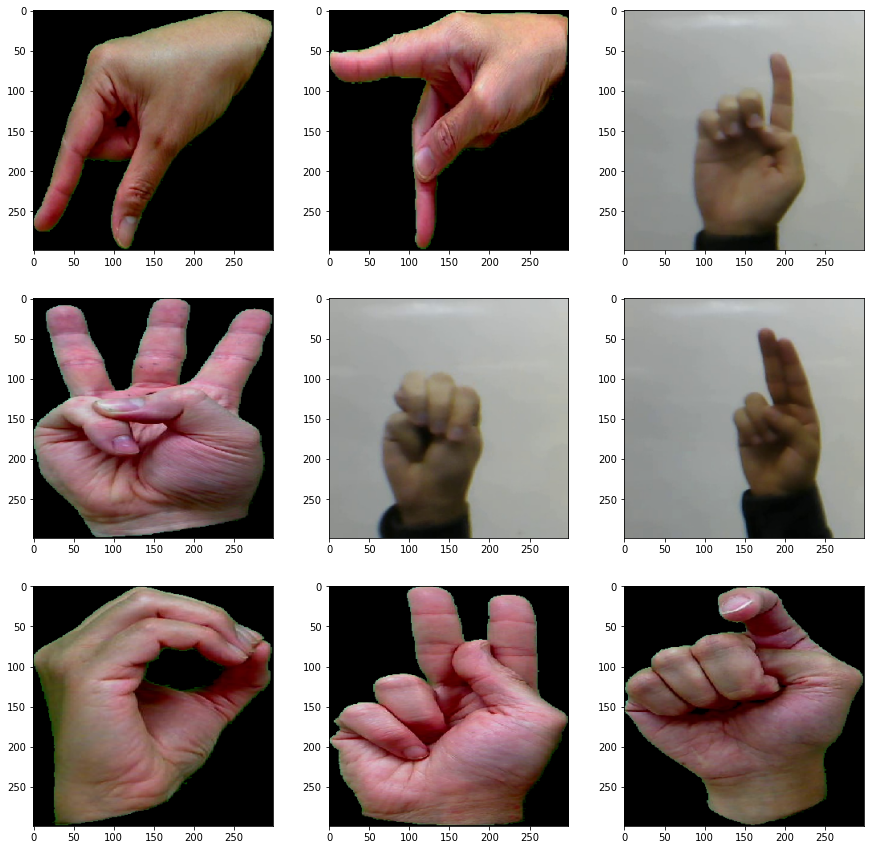

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
    #gera subfigures
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [ ]:
from google.colab import drive
import os

In [ ]:
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


#Treinando o Dataset



métricas de desempenho

* Acurácia 
* Precisão 
* Revocação 
* Média F1

In [ ]:
from tensorflow.python.client import device_lib
import tensorflow as tf
print  ("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))



Num GPUs Available:  1


In [ ]:

with tf.device('/device:GPU:0'): 
  ## hiperparâmetros
  BATCH_SIZE = 64
  IMG_SIZE = (299,299)
  NUM_CLASSES = 24
  INPUT_SHAPE = (299,299,3)

## paths
  for i in range(1,6):
    path = "/content/drive/MyDrive/TCC1/partition/partition-" + str(i) + os.sep
    train_dir = path + "train/"
    validation_dir =  path + "val/"
    test_dir = path + "test/"     
    
    
    ## GENERATORS
    train_datagen = ImageDataGenerator(rescale=1./255)
    validation_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')
    
    validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=IMG_SIZE,
        batch_size=1,
        class_mode='categorical',
        shuffle = False
      )
    
    ## Checa se já tem pasta para os logs do modelo, senão cria
    modelo = 'inception'
    logs_path = '/content/drive/MyDrive/TCC1/checkpoint/' + modelo + os. sep + 'partition-' +str(i) + os.sep
    if not os.path.isdir(logs_path):
        !os.mkdir(logs_path)
    
    
    
    ## Callbacks
    earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=100, verbose=2,restore_best_weights=True)
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath= logs_path + 'weights.{epoch:02d}-{val_accuracy:.2f}.hdf5',
    monitor='val_accuracy',
    mode='max',
    save_weights_only = False,
    save_best_only=True)
    logger = tf.keras.callbacks.CSVLogger(logs_path + 'log.out')
    
    
    ## Hiperparametros do treinamento
    EPOCHS = 300
    OPTIMIZER = tf.keras.optimizers.Nadam(learning_rate=1e-4)
    CALLBACKS = [earlystopping_callback,model_checkpoint_callback,logger]
    STEPS_PER_EPOCH = np.floor(980/BATCH_SIZE) 
    VALIDATION_STEPS = np.floor(140/BATCH_SIZE) 
    
    
    ## Ajuste da arquitetura do modelo com Dropout e camadas densas com tamanho mais adequado ao problema
    # Inception v3 + BatchNormalization + Dropout + 2 x Dense(100)

    inception = tf.keras.applications.InceptionV3(
        include_top=True,
        weights=None,
        classes=NUM_CLASSES,
        classifier_activation="softmax",
        )


    last = inception.layers[-2]
    x = Flatten()(last.output)
    x = BatchNormalization()(x)
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(NUM_CLASSES, activation = 'softmax')(x)

    # Create a new model
    model = Model(inception.input, predictions)
    
    # Compilando o modelo
    model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,metrics=["accuracy"])
    
    # Treino
    history = model.fit(train_generator, steps_per_epoch=STEPS_PER_EPOCH,epochs=EPOCHS, validation_data = validation_generator, 
                              validation_steps = VALIDATION_STEPS, callbacks = CALLBACKS, verbose=0)
    
    
    ##### Saidas
    ## plotar gráfico da loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Perda')
    plt.xlabel('Épocas')
    plt.legend(['Treino', 'Validação'], loc='upper left')
    plt.savefig(logs_path + "loss.jpg")
    plt.close()
    
    ## plotar gráfico da acc
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('Acurácia')
    plt.xlabel('Épocas')
    plt.legend(['Treino', 'Validação'], loc='upper left')
    plt.savefig(logs_path + "acc.jpg")
    
    ## Weighted Accuracy
    y_pred = model.predict(test_generator,verbose=1,steps=len(test_generator))
    y_pred = np.argmax(y_pred,axis=1)
    y_true = test_generator.labels
    accuracy = sklearn.metrics.balanced_accuracy_score(y_true,y_pred)
    print("Acurácia",accuracy)
    
    ## Weighted F-Score
    f_score = sklearn.metrics.f1_score(y_true, y_pred, average='weighted')
    print("F-Score",f_score)
    
    ## Precision
    precision = sklearn.metrics.precision_score(y_true, y_pred, average = 'macro')
    print("Precisão",precision)
    
    ## Recall
    recall = sklearn.metrics.recall_score(y_true, y_pred, average='micro')
    print("Revocação",recall)
    

Found 1841 images belonging to 24 classes.
Found 262 images belonging to 24 classes.
Found 529 images belonging to 24 classes.
Restoring model weights from the end of the best epoch.
Epoch 00213: early stopping
529/529 [==============================] - 195s 365ms/step
Acurácia 0.9696969696969697
F-Score 0.9694640017121616
Precisão 0.9710747032757903
Revocação 0.9697542533081286
Found 1841 images belonging to 24 classes.
Found 262 images belonging to 24 classes.
Found 529 images belonging to 24 classes.
Restoring model weights from the end of the best epoch.
Epoch 00225: early stopping
529/529 [==============================] - 157s 294ms/step
Acurácia 0.9867424242424242
F-Score 0.9866779872399938
Precisão 0.9885897435897436
Revocação 0.9867674858223062
Found 1841 images belonging to 24 classes.
Found 262 images belonging to 24 classes.
Found 529 images belonging to 24 classes.


In [ ]:
with tf.device('/device:GPU:0'): 
  ## hiperparâmetros
  BATCH_SIZE = 64
  IMG_SIZE = (299,299)
  NUM_CLASSES = 24
  INPUT_SHAPE = (299,299,3)

## paths
  for i in range(3,6):
    path = "/content/drive/MyDrive/TCC1/partition/partition-" + str(i) + os.sep
    train_dir = path + "train/"
    validation_dir =  path + "val/"
    test_dir = path + "test/"     
    
    
    ## GENERATORS
    train_datagen = ImageDataGenerator(rescale=1./255)
    validation_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')
    
    validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=IMG_SIZE,
        batch_size=1,
        class_mode='categorical',
        shuffle = False
      )
    
    ## Checa se já tem pasta para os logs do modelo, senão cria
    modelo = 'inception'
    logs_path = '/content/drive/MyDrive/TCC1/checkpoint/' + modelo + os. sep + 'partition-' +str(i) + os.sep
    if not os.path.isdir(logs_path):
        !os.mkdir(logs_path)
    
    
    
    ## Callbacks
    earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=100, verbose=2,restore_best_weights=True)
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath= logs_path + 'weights.{epoch:02d}-{val_accuracy:.2f}.hdf5',
    monitor='val_accuracy',
    mode='max',
    save_weights_only = False,
    save_best_only=True)
    logger = tf.keras.callbacks.CSVLogger(logs_path + 'log.out')
    
    
    ## Hiperparametros do treinamento
    EPOCHS = 300
    OPTIMIZER = tf.keras.optimizers.Nadam(learning_rate=1e-4)
    CALLBACKS = [earlystopping_callback,model_checkpoint_callback,logger]
    STEPS_PER_EPOCH = np.floor(980/BATCH_SIZE) 
    VALIDATION_STEPS = np.floor(140/BATCH_SIZE) 
    
    
    ## Ajuste da arquitetura do modelo com Dropout e camadas densas com tamanho mais adequado ao problema
    # Inception v3 + BatchNormalization + Dropout + 2 x Dense(100)

    inception = tf.keras.applications.InceptionV3(
        include_top=True,
        weights=None,
        classes=NUM_CLASSES,
        classifier_activation="softmax",
        )


    last = inception.layers[-2]
    x = Flatten()(last.output)
    x = BatchNormalization()(x)
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(NUM_CLASSES, activation = 'softmax')(x)

    # Create a new model
    model = Model(inception.input, predictions)
    
    # Compilando o modelo
    model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,metrics=["accuracy"])
    
    # Treino
    history = model.fit(train_generator, steps_per_epoch=STEPS_PER_EPOCH,epochs=EPOCHS, validation_data = validation_generator, 
                              validation_steps = VALIDATION_STEPS, callbacks = CALLBACKS, verbose=0)
    
    
    ##### Saidas
    ## plotar gráfico da loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Perda')
    plt.xlabel('Épocas')
    plt.legend(['Treino', 'Validação'], loc='upper left')
    plt.savefig(logs_path + "loss.jpg")
    plt.close()
    
    ## plotar gráfico da acc
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('Acurácia')
    plt.xlabel('Épocas')
    plt.legend(['Treino', 'Validação'], loc='upper left')
    plt.savefig(logs_path + "acc.jpg")
    
    ## Weighted Accuracy
    y_pred = model.predict(test_generator,verbose=1,steps=len(test_generator))
    y_pred = np.argmax(y_pred,axis=1)
    y_true = test_generator.labels
    accuracy = sklearn.metrics.balanced_accuracy_score(y_true,y_pred)
    print("Acurácia",accuracy)
    
    ## Weighted F-Score
    f_score = sklearn.metrics.f1_score(y_true, y_pred, average='weighted')
    print("F-Score",f_score)
    
    ## Precision
    precision = sklearn.metrics.precision_score(y_true, y_pred, average = 'macro')
    print("Precisão",precision)
    
    ## Recall
    recall = sklearn.metrics.recall_score(y_true, y_pred, average='micro')
    print("Revocação",recall)
    

Found 1841 images belonging to 24 classes.
Found 262 images belonging to 24 classes.
Found 529 images belonging to 24 classes.
Restoring model weights from the end of the best epoch.
Epoch 00261: early stopping
529/529 [==============================] - 184s 345ms/step
Acurácia 0.9924242424242425
F-Score 0.9924110997871918
Precisão 0.9931884057971013
Revocação 0.9924385633270322
Found 1841 images belonging to 24 classes.
Found 262 images belonging to 24 classes.
Found 529 images belonging to 24 classes.
Restoring model weights from the end of the best epoch.
Epoch 00215: early stopping
529/529 [==============================] - 141s 266ms/step
Acurácia 0.9791666666666666
F-Score 0.9795247048692614
Precisão 0.9826961519240379
Revocação 0.9792060491493384
Found 1841 images belonging to 24 classes.
Found 262 images belonging to 24 classes.
Found 529 images belonging to 24 classes.


In [ ]:

print(np.std(acuracias))
print(np.mean(acuracias))

0.8522727272727302
98.20075757575756


In [ ]:
print(np.std(fscores))
print(np.mean(fscores))

0.8566670728643242
98.20194484021522


In [ ]:
print("Desvio Padrão Precisão: ",np.std(prec))
print("Média Precisão: ",np.mean(prec))

0.8279568426405765
98.38872511466684


In [ ]:
print("Desvio padrão Revocação: ",np.std(revoc))
print("Média Revocação: ",np.mean(revoc))

0.850661625708884
98.20415879017014


oii
oii
Found 1841 images belonging to 24 classes.
Found 262 images belonging to 24 classes.
Found 529 images belonging to 24 classes.
Restoring model weights from the end of the best epoch.
Epoch 00202: early stopping
529/529 [==============================] - 159s 297ms/step
Acurácia 0.9810606060606061
F-Score 0.9811259267802501
Precisão 0.9819379744651484
Revocação 0.9810964083175804
matriz de confusão [[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0 21  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  

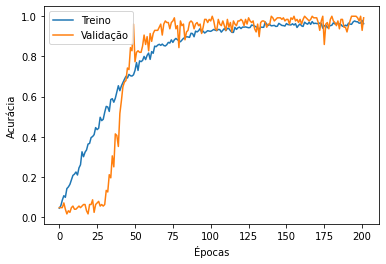

In [ ]:
with tf.device('/device:GPU:0'): 
  ## hiperparâmetros
  BATCH_SIZE = 64
  IMG_SIZE = (299,299)
  NUM_CLASSES = 24
  INPUT_SHAPE = (299,299,3)

## paths
  
  for i in range(5,6):
    
    path = "/content/drive/MyDrive/TCC1/partition/partition-" + str(i) + os.sep
    train_dir = path + "train/"
    validation_dir =  path + "val/"
    test_dir = path + "test/"     
    
    
    ## GENERATORS
    train_datagen = ImageDataGenerator(rescale=1./255)
    validation_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')
    
    validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=IMG_SIZE,
        batch_size=1,
        class_mode='categorical',
        shuffle = False
      )
    
    ## Checa se já tem pasta para os logs do modelo, senão cria
    modelo = 'inception'
    logs_path = '/content/drive/MyDrive/TCC1/checkpoint/' + modelo + os. sep + 'partition-' +str(i) + os.sep
    if not os.path.isdir(logs_path):
        !os.mkdir(logs_path)
    
    
    
    ## Callbacks
    earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=100, verbose=2,restore_best_weights=True)
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath= logs_path + 'weights.{epoch:02d}-{val_accuracy:.2f}.hdf5',
    monitor='val_accuracy',
    mode='max',
    save_weights_only = False,
    save_best_only=True)
    logger = tf.keras.callbacks.CSVLogger(logs_path + 'log.out')
    
    
    ## Hiperparametros do treinamento
    EPOCHS = 300
    OPTIMIZER = tf.keras.optimizers.Nadam(learning_rate=1e-4)
    CALLBACKS = [earlystopping_callback,model_checkpoint_callback,logger]
    STEPS_PER_EPOCH = np.floor(980/BATCH_SIZE) 
    VALIDATION_STEPS = np.floor(140/BATCH_SIZE) 
    
    
    ## Ajuste da arquitetura do modelo com Dropout e camadas densas com tamanho mais adequado ao problema
    # Inception v3 + BatchNormalization + Dropout + 2 x Dense(100)

    inception = tf.keras.applications.InceptionV3(
        include_top=True,
        weights=None,
        classes=NUM_CLASSES,
        classifier_activation="softmax",
        )


    last = inception.layers[-2]
    x = Flatten()(last.output)
    x = BatchNormalization()(x)
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(NUM_CLASSES, activation = 'softmax')(x)

    # Create a new model
    model = Model(inception.input, predictions)
    
    # Compilando o modelo
    model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,metrics=["accuracy"])
    
    # Treino
    history = model.fit(train_generator, steps_per_epoch=STEPS_PER_EPOCH,epochs=EPOCHS, validation_data = validation_generator, 
                              validation_steps = VALIDATION_STEPS, callbacks = CALLBACKS, verbose=0)
    
    
    ##### Saidas
    ## plotar gráfico da loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Perda')
    plt.xlabel('Épocas')
    plt.legend(['Treino', 'Validação'], loc='upper left')
    plt.savefig(logs_path + "loss.jpg")
    plt.close()
    
    ## plotar gráfico da acc
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('Acurácia')
    plt.xlabel('Épocas')
    plt.legend(['Treino', 'Validação'], loc='upper left')
    plt.savefig(logs_path + "acc.jpg")
    
    ## Weighted Accuracy
    y_pred = model.predict(test_generator,verbose=1,steps=len(test_generator))
    y_pred = np.argmax(y_pred,axis=1)
    y_true = test_generator.labels
    accuracy = sklearn.metrics.balanced_accuracy_score(y_true,y_pred)
    print("Acurácia",accuracy)
    
    ## Weighted F-Score
    f_score = sklearn.metrics.f1_score(y_true, y_pred, average='weighted')
    print("F-Score",f_score)
    
    ## Precision
    precision = sklearn.metrics.precision_score(y_true, y_pred, average = 'macro')
    print("Precisão",precision)
    
    ## Recall
    recall = sklearn.metrics.recall_score(y_true, y_pred, average='micro')
    print("Revocação",recall)
    
    #matriz de cinfusão
    confusion_matriz = sklearn.metrics.confusion_matrix(y_true, y_pred)
    print("matriz de confusão",confusion_matriz)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
import seaborn as sn

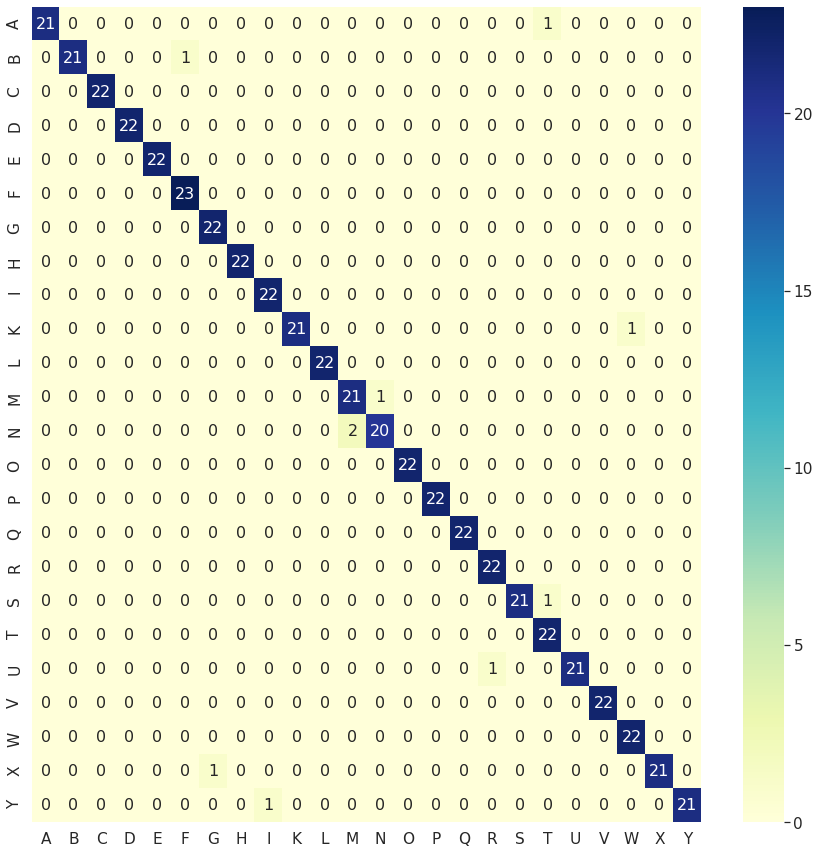

In [ ]:
df_cm = pd.DataFrame(confusion_matriz, range(24), range(24))
plt.figure(figsize=(15,15))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="YlGnBu", xticklabels= classes, yticklabels= classes) # font size

plt.show()

# Resultados

Resultados do Raimundo:

|   | Acurácia| Precisão| Revocação| Média F 1|
|---|---|----------|----------|---------|
|CNN 1|94.71%|94.77%|94.7%|94.7%|
|CNN 2|96.5%|96.54%| 96.49%|96.49%|
|CNN 3|96.83%|96.86%|96.82%|96.82%|
|CNN 4|96.83%|96.86%|96.82%|96.82%|

Arquiteturas da Literatura usadas pelo Raimundo:


|   | Acurácia| Precisão| Revocação| Média F 1|
|---|---|----------|----------|---------|
|InceptionV3|99.46%|99.46%|99.45%|99.45%|
|Inception ResNetV2|99.62% | 
|ResNet50 |96.83%|96.86%|96.82%|96.82%|
|Dense Net201 |96.83%|96.86%|96.82%|96.82%|
|VGG16|
|VGG19|
|LeNet|



# Inception V3
*   Primeiro Treino:

Epoch 00240: early stopping

|Acc | F-Score | Precisão | Revocação|
|-----|----------|---------|-----------|
99,24| 99,22|99,30|99,24


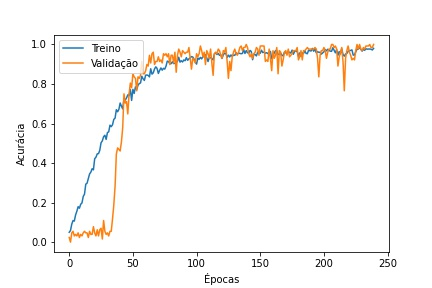

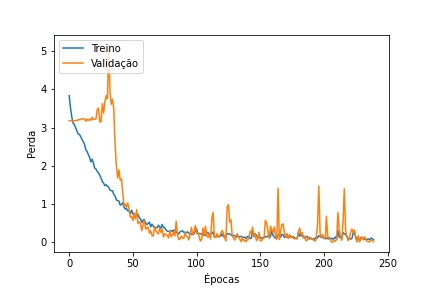

*   Segundo Treino:


|Acc | F-Score | Precisão | Revocação|
|-----|----------|---------|-----------|
98,10| 98,10|98,26|98,11

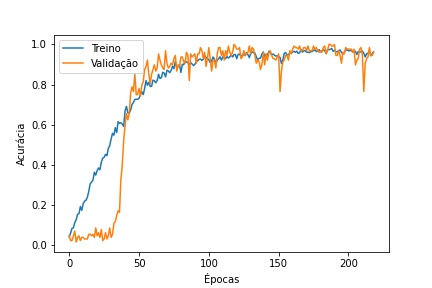

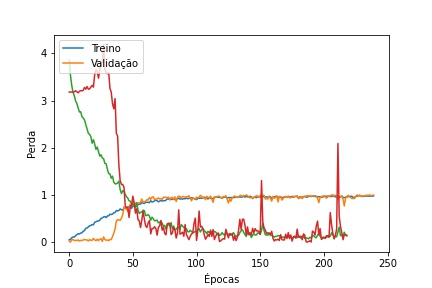

* Terceiro Treino:


|Acc | F-Score | Precisão | Revocação|
|-----|----------|---------|-----------|
|98,51| 98,48|98,61|98,49|

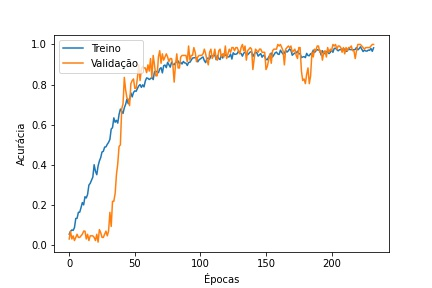


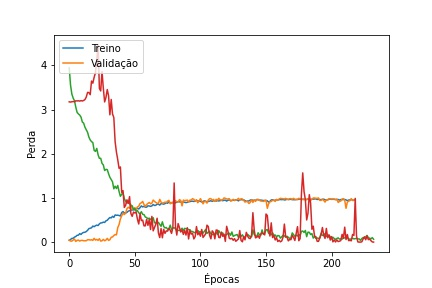


* Quarto Treino:



|Acc | F-Score | Precisão | Revocação|
|-----|----------|---------|-----------|
98,10| 98,13|98,41|98,13

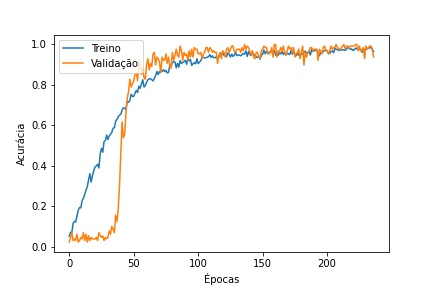

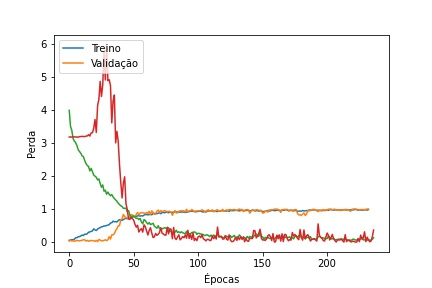

